# **Database Access**

+ Data are observations or measurements (unprocessed or processed) represented as text, numbers, or multimedia.
+ A dataset is a structured collection of data generally associated with a unique body of work.
+ A database is an organized collection of data stored as multiple datasets.

# **SQLite**
+ SQLite is a C library that provides a lightweight disk-based database that can provide a relational database management system with zero-configuration.
+ SQLite is an embedded SQL database engine. Unlike most other SQL databases, SQLite does not have a separate server process.
+ The SQLite project was started on 2000-05-09.
+ SQLite database files are commonly used as containers to transfer rich content between systems.
+ SQLite is built into all mobile phones and most computers.
+ It can be used in many programming languages including Python
+ We will use SQLite version 3 or SQLite3


**In summary**:
SQLite is a library used for quick and simple databases.

+ quick: we dont need to setup an special data server for this :) - It is a serverless database
+ simple: because it uses regular SQL commands (English instructions alike)



## **Create Connection and Database**
+ First import the sqlite3 module and then create a connection object which will connect us to the database.
+ Call sqlite3.connect() to create a connection to the database example.db in the current working directory.

+ That will create a new file with the name ‘mydatabase.db’.
+ The returned Connection object con represents the connection to the on-disk database.


In [ ]:
import sqlite3

con = sqlite3.connect('mydatabase.db')


In [ ]:
con

## **SQLite3 Cursor**
+ In order to execute SQL statements and fetch results from SQL queries, we will need to use a database cursor.
+ The SQLite3 cursor is a method of the connection object.
+ Call con.cursor() to create the Cursor as follow:
+ Now we can use the cursor object to call the execute() method to execute any SQL queries.

In [ ]:
cursorObj = con.cursor()

In [ ]:
cursorObj

## **Create a Table**
+ To create a table in SQLite3, we can use the CREATE TABLE query in the execute() method. Consider the following steps:
1) Create a connection object.
2) From the connection object, create a cursor object.
3) Using the cursor object, call the execute method with create table query as the parameter.
+ Let’s create employees with the following attributes. Execute the CREATE TABLE statement by calling cursorObj.execute(...)
 + (id, name, salary, position)

+ The PRIMARY KEY constraint uniquely identifies each record in a table.
+ Specifying the data types is optional.


In [ ]:
cursorObj.execute("CREATE TABLE employees(id integer PRIMARY KEY, name text, salary real, position text)")


## **Verify Table**
+ We can verify that the newly created table by querying the sqlite_master table built-in to SQLite, which should now contain an entry for the employees table definition.
+ Execute that query by calling cursorObj.execute(...), assign the result to res, and call res.fetchone() to fetch the resulting row:




In [ ]:
res = cursorObj.execute("SELECT name FROM sqlite_master")
res.fetchone()[0]

'employees'

+ If we query sqlite_master for a non-existent table, res.fetchone() will return None:

In [ ]:
res = cursorObj.execute("SELECT name FROM sqlite_master WHERE name='Cat' ")
res.fetchone() is None

True

In [ ]:
## Alternative option to verify a table
cursorObj.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursorObj.fetchall())

[('employees',)]


In [ ]:
names = [description[0] for description in cursorObj.description]
names

['name']

In [ ]:
cursorObj.description

(('name', None, None, None, None, None, None),)

In [ ]:
def sqlite_table_schema(conn, name):
    cursor = conn.execute("SELECT sql FROM sqlite_master WHERE name=?;", [name])
    sql = cursor.fetchone()[0]
    cursor.close()
    return sql

In [ ]:
print(sqlite_table_schema(con, 'employees'))

CREATE TABLE employees(id integer PRIMARY KEY, name text, salary real, position text)


## **Insert in Table**
+ To insert data in a table, we use the INSERT INTO statement. Consider the following line of code:


In [ ]:
cursorObj.execute("INSERT INTO employees VALUES(1, 'Mike', 1000, 'Manager') ")
con.commit()

+ The INSERT statement implicitly opens a transaction, which needs to be committed before changes are saved in the database (see Transaction control for details). Call con.commit() on the connection object to commit the transaction.
+ We can verify that the data was inserted correctly by executing a SELECT query. Use the cursorObj.execute(...) to assign the result to res, and call res.fetchall() to return all resulting rows:


In [ ]:
res = cursorObj.execute("SELECT name FROM employees")
res.fetchall()

[('Mike',)]

In [ ]:
res = cursorObj.execute("SELECT * FROM employees")
res.fetchone()

(1, 'Mike', 1000.0, 'Manager')

## **Insert more rows in Table**

 + We can insert three more rows by calling cur.executemany(...):
+ We can use the question mark (?) as a placeholder for each value.


In [ ]:
data = [
    (2, 'Jack', 850, 'IT'),
    (3, 'Andrew', 800, 'Tech'),
    (4, 'Mason', 1500, 'CTO'),
    (5, 'Abel', 1000, 'CTO'),
]


In [ ]:
cursorObj.executemany("INSERT INTO employees VALUES(?, ?, ?,?)", data)
con.commit()  # Remember to commit the transaction after executing INSERT.


+ Verify that the new rows by executing a SELECT query:


In [ ]:
#for row in cursorObj.execute("SELECT name, salary, position FROM employees ORDER BY salary"):
for row in cursorObj.execute("SELECT name, salary FROM employees ORDER BY salary"):
    print(row)


('Andrew', 800.0)
('Jack', 850.0)
('Mike', 1000.0)
('Abel', 1000.0)
('Mason', 1500.0)


## **Update Table**
+ To update the table, simply create a connection, then create a cursor object using the connection and finally use the UPDATE statement in the execute() method.
+ Suppose we want to update the employee’s salary whose id equals 3, we will use the UPDATE statement for the employee whose id equals 3.
+ The WHERE clause will be used as a condition to select this employee.

In [ ]:
cursorObj.execute('UPDATE employees SET salary = 900 where id = 3')
con.commit()


+ We now can verify the updated table by the statement:


In [ ]:
for row in cursorObj.execute("SELECT name, salary, position FROM employees order by salary"):
    print(row)


('Jack', 850.0, 'IT')
('Andrew', 900.0, 'Tech')
('Mike', 1000.0, 'Manager')
('Abel', 1000.0, 'CTO')
('Mason', 1500.0, 'CTO')


## **Fetch data**

+ To fetch specific rows, we can combine SELECT, WHERE, fetchall statements  
+ Suppose we want to print the id and names of those who have a salary greater than 1000:


In [ ]:
cursorObj.execute('SELECT id, name FROM employees WHERE salary >= 1000.0')

In [ ]:
rows=cursorObj.fetchall()
for row in rows:
  print(row)

(1, 'Mike')
(4, 'Mason')
(5, 'Abel')


# **Select Statement**

In [ ]:
for row in cursorObj.execute("SELECT position FROM employees"):
    print(row)


('Manager',)
('IT',)
('Tech',)
('CTO',)
('CTO',)


In [ ]:
res = cursorObj.execute("SELECT name FROM employees")
res.fetchall()


[('Mike',), ('Jack',), ('Andrew',), ('Mason',), ('Abel',)]

In [ ]:
for row in cursorObj.execute("SELECT * FROM employees"):
    print(row)



(1, 'Mike', 1000.0, 'Manager')
(2, 'Jack', 850.0, 'IT')
(3, 'Andrew', 900.0, 'Tech')
(4, 'Mason', 1500.0, 'CTO')
(5, 'Abel', 1000.0, 'CTO')


# **LIMIT operator**

In [ ]:
# SELECT the first 2 rows of employees
cursorObj.execute('SELECT * FROM employees LIMIT 2;')
cursorObj.fetchall()


[(1, 'Mike', 1000.0, 'Manager'), (2, 'Jack', 850.0, 'IT')]

In [ ]:
cursorObj.execute('SELECT id, name, salary FROM employees WHERE salary > 900.0')
rows = cursorObj.fetchall()
for row in rows:
    print(row)


(1, 'Mike', 1000.0)
(4, 'Mason', 1500.0)
(5, 'Abel', 1000.0)


In [ ]:
cursorObj.execute('SELECT id, name, salary FROM employees WHERE salary > 500.0  LIMIT 2 OFFSET 1')
rows = cursorObj.fetchall()
for row in rows:
    print(row)


(2, 'Jack', 850.0)
(3, 'Andrew', 900.0)


# **OFFSET operator**

In [ ]:
# SELECT the first 2 rows of employees starting from third row
cursorObj.execute('SELECT * FROM employees LIMIT 2 OFFSET 2')
cursorObj.fetchall()


[(3, 'Andrew', 900.0, 'Tech'), (4, 'Mason', 1500.0, 'CTO')]

# **LIKE operator**

In [ ]:
cursorObj.execute('SELECT * from employees WHERE name LIKE "%Ja%" ')
cursorObj.fetchall()

[(2, 'Jack', 850.0, 'IT')]

In [ ]:
cursorObj.execute('SELECT * from employees WHERE name LIKE "%Ab%" ')
cursorObj.fetchall()

[(5, 'Abel', 1000.0, 'CTO')]

In [ ]:
cursorObj.execute('SELECT * from employees WHERE salary LIKE "1%" ')
cursorObj.fetchall()


[(1, 'Mike', 1000.0, 'Manager'),
 (4, 'Mason', 1500.0, 'CTO'),
 (5, 'Abel', 1000.0, 'CTO')]

## **11/08/23**

# **Example**

In [ ]:
cities=[
        ("Liberty City", "New York"),
        ("Vice City", "Miami"),
        ("Los Santos", "Los Angeles")
]

release_list = [
    (1997, "Grand Theft Auto", "state of New Guernsey"),
    (1999, "Grand Theft Auto 2", "Anywhere, USA"),
    (2001, "Grand Theft Auto III", "Liberty City"),
    (2002, "Grand Theft Auto: Vice City", "Vice City"),
    (2004, "Grand Theft Auto: San Andreas", "state of San Andreas"),
    (2008, "Grand Theft Auto IV", "Liberty City"),
    (2013, "Grand Theft Auto V", "Los Santos")
]

In [ ]:
##import libraries
import sqlite3

## stablish connection
#connection=sqlite3.Connection('gta.db')

## set a coursor to the connection
#cursor=connection.cursor()
#cursor
##Create a table
#cursor.execute("create table gta (release_year integer, release_title text, city text)")

##Verify table



sqlite_table_schema(connection, "gta")
## Populating the table (Insert)

#cursor.executemany("insert into gta values (?,?,?)", release_list)
## Print database row
cursor.execute("select * from gta").fetchall()
#for record in cursor.execute("select * from gta"):
#  print(record)

#### Select where
print("**********")
cursor.execute("select release_year from gta where city like 'Lib%'").fetchall()


### create another table
#cursor.execute("create table cities (gta_city text, real_city text)")
#cursor.executemany("insert into cities values (?,?)", cities)



### verify new table
print("**********")

res=cursor.execute("select name from sqlite_master")
print(res.fetchall())



cursor.execute("select * from gta where city='Liberty City'")
gta_search=cursor.fetchall()
print(gta_search)
#### Select where in new table
#print("**********")
cursor.execute("select * from cities where gta_city='Liberty City'")
city_search=cursor.fetchall()
print(city_search)

##adjust name in gta
#print("**********")

print("**********")
for record in gta_search:
  adjusted=[city_search[0][1] if city_search[0][0]==value else value for value in record]
  print(adjusted)


#connection.close()

**********
**********
[('gta',), ('cities',)]
[(2001, 'Grand Theft Auto III', 'Liberty City'), (2008, 'Grand Theft Auto IV', 'Liberty City'), (2001, 'Grand Theft Auto III', 'Liberty City'), (2008, 'Grand Theft Auto IV', 'Liberty City')]
[('Liberty City', 'New York')]
**********
[2001, 'Grand Theft Auto III', 'New York']
[2008, 'Grand Theft Auto IV', 'New York']
[2001, 'Grand Theft Auto III', 'New York']
[2008, 'Grand Theft Auto IV', 'New York']


In [ ]:
city_search

[('Liberty City', 'New York')]

In [ ]:
gta_search

[(2001, 'Grand Theft Auto III', 'Liberty City'),
 (2008, 'Grand Theft Auto IV', 'Liberty City'),
 (2001, 'Grand Theft Auto III', 'Liberty City'),
 (2008, 'Grand Theft Auto IV', 'Liberty City')]

In [ ]:
# @title
##import libraries
import sqlite3

## stablish connection
connection=sqlite3.Connection('gta.db')

## set a coursor to the connection
cursor=connection.cursor()
#cursor
##Create a table
cursor.execute("create table gta (release_year integer, release_name text, city text)")

##Verify table
sqlite_table_schema(connection, "gta")


## Populating the table (Insert)
cursor.executemany("insert into gta values (?,?,?)", release_list)

## Print database row
#cursor.execute("select * from gta").fetchall()

for record in cursor.execute("select * from gta"):
  print(record)

#### Select where
print("**********")
#cursor.execute("select release_name from gta where city='Liberty City'").fetchall()
cursor.execute("select * from gta where city='Liberty City'")
gta_search=cursor.fetchall()
print(gta_search)
### create another table
cursor.execute("create table cities (gta_city text, real_city text)")
cursor.executemany("insert into cities values (?,?)", cities)

res=cursor.execute("select name from sqlite_master")


### verify new table
print("**********")
print(res.fetchall())

#### Select where in new table
print("**********")
cursor.execute("select * from cities where gta_city='Liberty City'")
city_search=cursor.fetchall()
print(city_search)

##adjust name in gta
print("**********")
for record in gta_search:
  adjusted=[city_search[0][1] if city_search[0][0]==value else value for value in record]
  print(adjusted)

#connection.close()

(1997, 'Grand Theft Auto', 'state of New Guernsey')
(1999, 'Grand Theft Auto 2', 'Anywhere, USA')
(2001, 'Grand Theft Auto III', 'Liberty City')
(2002, 'Grand Theft Auto: Vice City', 'Vice City')
(2004, 'Grand Theft Auto: San Andreas', 'state of San Andreas')
(2008, 'Grand Theft Auto IV', 'Liberty City')
(2013, 'Grand Theft Auto V', 'Los Santos')
**********
[(2001, 'Grand Theft Auto III', 'Liberty City'), (2008, 'Grand Theft Auto IV', 'Liberty City')]
**********
[('gta',), ('cities',)]
**********
[('Liberty City', 'New York')]
**********
[2001, 'Grand Theft Auto III', 'New York']
[2008, 'Grand Theft Auto IV', 'New York']


In [ ]:
gta_search

[(2001, 'Grand Theft Auto III', 'Liberty City'),
 (2008, 'Grand Theft Auto IV', 'Liberty City')]

In [ ]:
def verRecord(connection, table):
  cur=connection.cursor()
  for record in cur.execute(f"select * from {table}"):
    print(record)
  #connection.close()

In [ ]:
verRecord(connection, "gta")

(1997, 'Grand Theft Auto', 'state of New Guernsey')
(1999, 'Grand Theft Auto 2', 'Anywhere, USA')
(2001, 'Grand Theft Auto III', 'Liberty City')
(2002, 'Grand Theft Auto: Vice City', 'Vice City')
(2004, 'Grand Theft Auto: San Andreas', 'state of San Andreas')
(2008, 'Grand Theft Auto IV', 'Liberty City')
(2013, 'Grand Theft Auto V', 'Los Santos')


# Pop-up question
In the following table, what would be the command if you want to display all the records from employees table where ADDRESS starts with ‘T’ and order the query by salary.


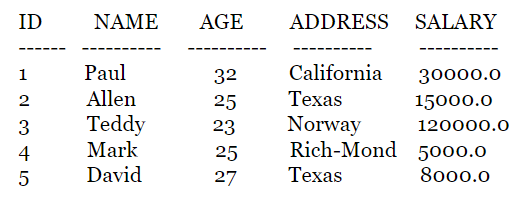

In [ ]:
employees_new=[
    (1, "Paul", 32, "Califorania", 30000.0),
    (2, "Allen", 25, "Texas", 15000.0),
    (3, "Teddy", 23, "Norway", 120000.0),
    (4, "Mark", 25, "Rich-Mond", 5000.0),
    (5, "David", 27, "Texas", 8000.0),
]

In [ ]:

# create new table
cursorObj.execute("CREATE TABLE employees_new(id integer PRIMARY KEY, name text, age integer, address text, salary real)")
cursorObj.executemany("INSERT INTO employees_new VALUES(?, ?, ?, ?, ?)", employees_new)
con.commit()  # Remember to commit the transaction after executing INSERT.



In [ ]:
search_emp=cursorObj.execute("Select * from employees_new")
search_emp.fetchall()


[(1, 'Paul', 32, 'Califorania', 30000.0),
 (2, 'Allen', 25, 'Texas', 15000.0),
 (3, 'Teddy', 23, 'Norway', 120000.0),
 (4, 'Mark', 25, 'Rich-Mond', 5000.0),
 (5, 'David', 27, 'Texas', 8000.0)]

In [ ]:
for emp in cursorObj.execute("Select * from employees_new"):
  print(emp)


(1, 'Paul', 32, 'Califorania', 30000.0)
(2, 'Allen', 25, 'Texas', 15000.0)
(3, 'Teddy', 23, 'Norway', 120000.0)
(4, 'Mark', 25, 'Rich-Mond', 5000.0)
(5, 'David', 27, 'Texas', 8000.0)


In [ ]:
search=cursorObj.execute("Select * from employees_new where address like 'T%' order by salary ")
print(search.fetchall())

[(5, 'David', 27, 'Texas', 8000.0), (2, 'Allen', 25, 'Texas', 15000.0)]


# **Longer Queries**
+ For longer queries, it helps to format them like this, with each SQL command on a separate line:


In [ ]:
cursorObj.execute("select name, salary, position from employees where salary >= 1000 limit 2 offset 1")
#cursorObj.execute(query)
cursorObj.fetchall()


[('Mason', 1500.0, 'CTO'), ('Abel', 1000.0, 'CTO')]

In [ ]:
query='''
select name, salary, position
from employees
where salary >= 1000
limit 2 offset 1
'''
cursorObj.execute(query)
cursorObj.fetchall()

[('Mason', 1500.0, 'CTO'), ('Abel', 1000.0, 'CTO')]

#  **GROUP BY clause**
+ The GROUP BY clause is an optional clause of the SELECT statement. The GROUP BY clause selects a group of rows into summary rows by values of one or more columns.
+ The GROUP BY clause returns one row for each group. For each group, you can apply an aggregate function such as MIN, MAX, SUM, COUNT, or AVG to provide more information about each group.


In [ ]:
cursorObj.execute('SELECT Count(name), address from employees_new GROUP BY address')
rows = cursorObj.fetchall()
for row in rows:
    print(row)


(1, 'Califorania')
(1, 'Norway')
(1, 'Rich-Mond')
(2, 'Texas')


In [ ]:
cursorObj.execute('SELECT SUM(salary), address from employees_new GROUP BY address')
rows = cursorObj.fetchall()
for row in rows:
    print(row)


(30000.0, 'Califorania')
(120000.0, 'Norway')
(5000.0, 'Rich-Mond')
(23000.0, 'Texas')


# **DISTINCT operator**
+ SQLite DISTINCT keyword is used in conjunction with SELECT statement to eliminate all the duplicate records and fetch only the unique records.
+ Consider emp table with the following records.


In [ ]:
cursorObj.execute('Insert into employees_new values (6, "David", 32, "Michigan", 9000.0)')
con.commit()

for row in cursorObj.execute("select * from employees_new"):
  print(row)

(1, 'Paul', 32, 'Califorania', 30000.0)
(2, 'Allen', 25, 'Texas', 15000.0)
(3, 'Teddy', 23, 'Norway', 120000.0)
(4, 'Mark', 25, 'Rich-Mond', 5000.0)
(5, 'David', 27, 'Texas', 8000.0)
(6, 'David', 32, 'Michigan', 9000.0)


In [ ]:
cursorObj.execute("SELECT DISTINCT name FROM employees_new")
cursorObj.fetchall()


[('Paul',), ('Allen',), ('Teddy',), ('Mark',), ('David',)]

In [ ]:
cursorObj.execute("SELECT DISTINCT address FROM employees_new")
cursorObj.fetchall()


[('Califorania',), ('Texas',), ('Norway',), ('Rich-Mond',), ('Michigan',)]

# **The AND / OR Operator**
+ SQLite AND & OR operators are used to compile multiple conditions to narrow down the selected data in an SQLite statement.
+ Consider COMPANY table with the following records.


+ Query  salary >= 10000 AND age <= 25


In [ ]:
cursorObj.execute('SELECT * FROM employees_new WHERE salary >= 10000 AND age <= 25').fetchall()


[(2, 'Allen', 25, 'Texas', 15000.0), (3, 'Teddy', 23, 'Norway', 120000.0)]

Query  salary >= 12000 OR age > 25


In [ ]:
cursorObj.execute('SELECT * FROM employees_new WHERE salary >= 12000 OR age > 25')#.fetchall()


# **SQLite3 rowcount**
+ The SQLite3 rowcount is used to return the number of rows that are selected by the latest executed SQL query.
+ To retrieve the total row count, we need to fetch all the data, and then get the length of the result:


In [ ]:
rows = cursorObj.fetchall()
print(len (rows))


5


# **Check if a table exists or not**
+ When creating a table, we should make sure that the table is not already existed.
+ To check if the table doesn’t already exist, we use “if not exists” with the CREATE TABLE statement as follows:


In [ ]:
cursorObj.execute('create table if not exists students(id integer, name text)')

+ Verify the new table:


In [ ]:
cursorObj.execute("SELECT name FROM sqlite_master")
print(cursorObj.fetchall())

[('employees',), ('employees_new',), ('students',)]


# **Drop table**
+ To check if the table exists when deleting, we use “if exists” with the DROP TABLE statement as follows:


In [ ]:
cursorObj.execute('DROP TABLE if exists students')


+ Verify if dropped:


In [ ]:
cursorObj.execute("SELECT name FROM sqlite_master")
print(cursorObj.fetchall())


[('employees',), ('employees_new',)]


# **DELETE Query**
+ SQLite DELETE Query is used to delete the existing records from a table.
+ We can use WHERE clause with DELETE query to delete the selected rows, otherwise, all the records would be deleted.
+ Consider *employees_new* table with the following records.

+ If we want to DELETE an employee row whose ID is 3.


In [ ]:
def verifyRecords(con, table):
  cur=con.cursor()
  for emp in cur.execute(f"select id from {table}"):
    print(emp)

verifyRecords(con, "employees_new")

(1,)
(2,)
(3,)
(4,)
(5,)
(6,)


In [ ]:
for emp in cursorObj.execute("select id from employees_new"):
  print(emp)

(1,)
(2,)
(3,)
(4,)
(5,)
(6,)


In [ ]:
cursorObj.execute('DELETE FROM employees_new WHERE ID = 3')


In [ ]:
for emp in cursorObj.execute("select id from employees_new"):
  print(emp)

(1,)
(2,)
(4,)
(5,)
(6,)


# **Close Connection**
+ Once done with database, it is a good practice to close the connection.
+ We can close the connection by using the close() method.


In [ ]:
con = sqlite3.connect('mydatabase.db')
con.close()


**SQL databases give you several things that CSV files don't.**

+ Working with data larger than you could fit in your process memory.

+ Querying and Modifying Data faster than going over the entire dataset one by one (when using indexed columns)

+ Creating relationships between different Tables, and querying and modifying things using that relationship.

+ Working with a single data source safely from 2 or more processes.


In [ ]:
import sqlite3

connection=sqlite3.connect("gta.db")
cursor=connection.cursor()
cursor.execute("create table gta (release_year integer, release_name text, city text)")


cursor.executemany("insert into gta values (?,?,?)", release_list)

## print database rows
for row in cursor.execute("select * from gta"):
  print(row)


#### Select where
print("**********")
cursor.execute("select * from gta where city ='Liberty City'")
gta_search=cursor.fetchall()
print(gta_search)

### create another table
print("********")
cursor.execute("create table cities (gta_city text, real_city text)")
cursor.executemany("insert into cities values (?,?)", cities)
res = cursor.execute("SELECT name FROM sqlite_master")

print(res.fetchall())


print("*******")
cursor.execute("select * from cities where gta_city='Liberty City'")
cities_search=cursor.fetchall()
print(cities_search)

print("*******")
for record in gta_search:
  adjusted=[cities_search[0][1] if value==cities_search[0][0] else value for value in record]
  print(adjusted)
connection.close()

(1997, 'Grand Theft Auto', 'state of New Guernsey')
(1999, 'Grand Theft Auto 2', 'Anywhere, USA')
(2001, 'Grand Theft Auto III', 'Liberty City')
(2002, 'Grand Theft Auto: Vice City', 'Vice City')
(2004, 'Grand Theft Auto: San Andreas', 'state of San Andreas')
(2008, 'Grand Theft Auto IV', 'Liberty City')
(2013, 'Grand Theft Auto V', 'Los Santos')
**********
[(2001, 'Grand Theft Auto III', 'Liberty City'), (2008, 'Grand Theft Auto IV', 'Liberty City')]
********
[('gta',), ('cities',)]
*******
[('Liberty City', 'New York')]
*******
[2001, 'Grand Theft Auto III', 'New York']
[2008, 'Grand Theft Auto IV', 'New York']
